In [ ]:
import pandas as pd

df = pd.read_csv('/content/MSFTlatest.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-02,127.980003,128.000000,125.519997,126.209999,120.138321,27350200
1,2019-05-03,127.360001,129.429993,127.250000,128.899994,122.698921,24911100
2,2019-05-06,126.389999,128.559998,126.110001,128.149994,121.985008,24239800
3,2019-05-07,126.459999,127.180000,124.220001,125.519997,119.481514,36017700
4,2019-05-08,125.440002,126.370003,124.750000,125.510002,119.472015,28419000
...,...,...,...,...,...,...,...
1254,2024-04-25,394.029999,399.890015,388.029999,399.040009,399.040009,40586500
1255,2024-04-26,412.170013,413.000000,405.760010,406.320007,406.320007,29694700
1256,2024-04-29,405.250000,406.320007,399.190002,402.250000,402.250000,19582100
1257,2024-04-30,401.489990,402.160004,389.170013,389.329987,389.329987,28781400


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2019-05-02,126.209999
1,2019-05-03,128.899994
2,2019-05-06,128.149994
3,2019-05-07,125.519997
4,2019-05-08,125.510002
...,...,...
1254,2024-04-25,399.040009
1255,2024-04-26,406.320007
1256,2024-04-29,402.250000
1257,2024-04-30,389.329987


In [ ]:
df['Date']

0       2019-05-02
1       2019-05-03
2       2019-05-06
3       2019-05-07
4       2019-05-08
           ...    
1254    2024-04-25
1255    2024-04-26
1256    2024-04-29
1257    2024-04-30
1258    2024-05-01
Name: Date, Length: 1259, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2023-03-19')
datetime_object

datetime.datetime(2023, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,2019-05-02,126.209999
1,2019-05-03,128.899994
2,2019-05-06,128.149994
3,2019-05-07,125.519997
4,2019-05-08,125.510002
...,...,...
1254,2024-04-25,399.040009
1255,2024-04-26,406.320007
1256,2024-04-29,402.250000
1257,2024-04-30,389.329987


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-42-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2019-05-02
1      2019-05-03
2      2019-05-06
3      2019-05-07
4      2019-05-08
          ...    
1254   2024-04-25
1255   2024-04-26
1256   2024-04-29
1257   2024-04-30
1258   2024-05-01
Name: Date, Length: 1259, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2019-05-02,126.209999
2019-05-03,128.899994
2019-05-06,128.149994
2019-05-07,125.519997
2019-05-08,125.510002
...,...
2024-04-25,399.040009
2024-04-26,406.320007
2024-04-29,402.250000


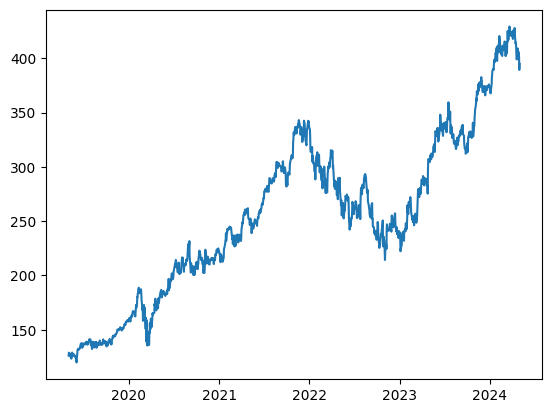

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

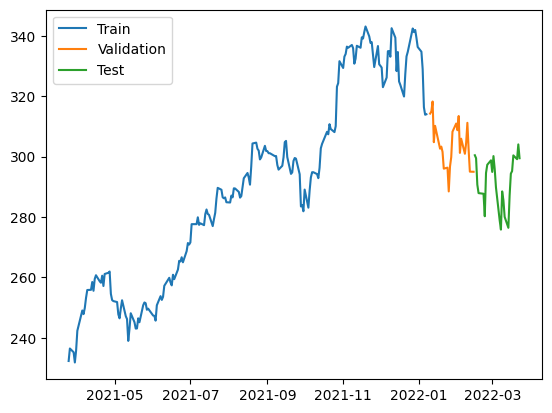

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 136ms/step - loss: 84427.4453 - mean_absolute_error: 288.8226 - val_loss: 91812.0625 - val_mean_absolute_error: 302.9176
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 83735.9297 - mean_absolute_error: 287.6237 - val_loss: 91090.2266 - val_mean_absolute_error: 301.7238
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 83013.9219 - mean_absolute_error: 286.3639 - val_loss: 90217.9531 - val_mean_absolute_error: 300.2749
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 82087.6719 - mean_absolute_error: 284.7416 - val_loss: 89032.5781 - val_mean_absolute_error: 298.2945
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 80770.9609 - mean_absolute_error: 282.4133 - val_loss: 87300.9375 - val_mean_absolute_error: 295.3777
Epoch 6/100
7/7 [==============================] - 0s 19ms/step - loss: 79022.3750 - mean_absolute_error: 279.2988 - val_loss: 85

7/7 [==============================] - 0s 3ms/step


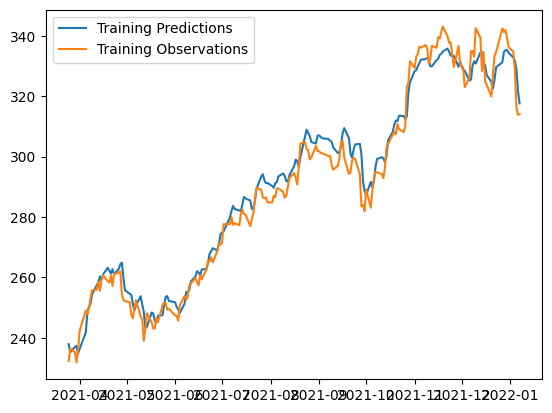

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 23ms/step


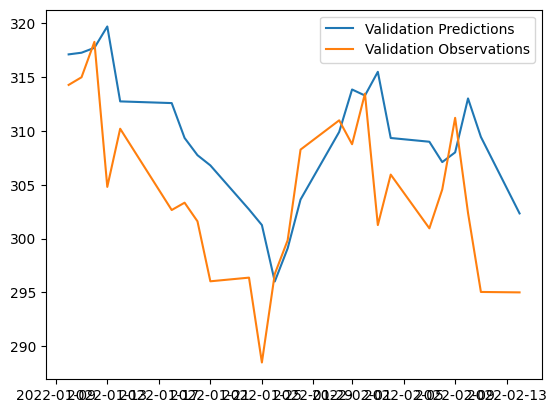

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 24ms/step


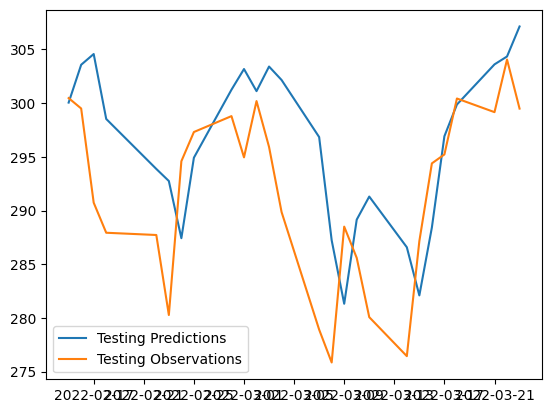

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

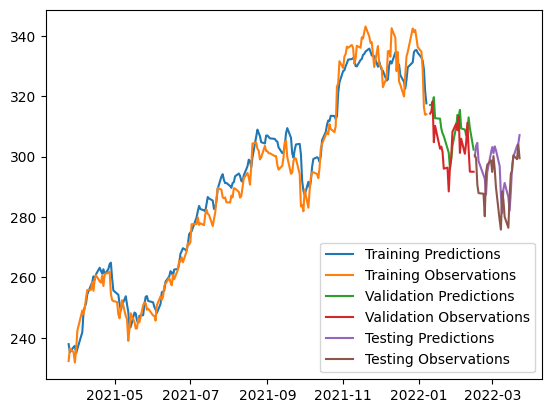

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 21ms/step


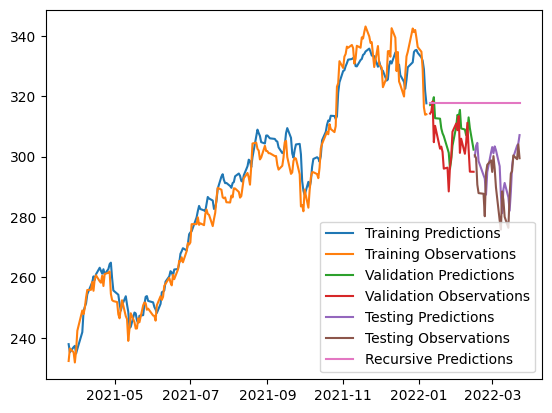

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])